In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
taxons = pd.read_csv("/content/drive/MyDrive/Research/MicrobiomeDB/data/mapping_columns.csv")

In [ ]:
strings = taxons['taxon'].tolist()

In [ ]:
len(strings)

409

In [ ]:
# Determine the maximum number of splits
max_splits = max(len(s.split(';')) for s in strings)

# Split the strings and create a list of dictionaries
data = []
for s in strings:
    splits = s.split(';')
    splits.extend(['N/A'] * (max_splits - len(splits)))  # Add 'N/A' for missing splits
    data.append(dict(zip(range(1, max_splits + 1), splits)))

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Rename the columns
df.columns =["Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"]
df["Index"] = df.index

In [ ]:
df

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Index
0,Age (years),N/A,N/A,N/A,N/A,N/A,N/A,0
1,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,N/A,1
2,Archaea,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,N/A,N/A,2
3,Bacteria,Abditibacteriota,Abditibacteria,Abditibacteriales,Abditibacteriaceae,Abditibacterium,N/A,3
4,Bacteria,Actinobacteriota,Actinobacteria,N/A,N/A,N/A,N/A,4
...,...,...,...,...,...,...,...,...
404,Mom reported antibiotic use during pregnancy,N/A,N/A,N/A,N/A,N/A,N/A,404
405,"Plasmodium asexual stages, by microscopy",N/A,N/A,N/A,N/A,N/A,N/A,405
406,Previous pregnancies count,N/A,N/A,N/A,N/A,N/A,N/A,406
407,Unnamed: 0,N/A,N/A,N/A,N/A,N/A,N/A,407


In [ ]:
processed_data = pd.read_csv('/content/drive/MyDrive/Research/MicrobiomeDB/data/combined_preprocessed_data.csv')

In [ ]:
processed_data

,sample,0,397,405,396,406,395,408,404,394,...,289,331,333,338,361,362,389,390,400,401
0,6020.SRR12919063,27.0,48.0,0,0,3,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6052.SRR12919052,0.0,8.0,0,1,3,0,2,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6049.SRR12919053,18.0,48.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6008.SRR12919096,25.0,13.0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6010.SRR12919077,26.0,12.0,1,0,4,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,6016.SRR12919573,30.0,3.0,0,0,6,0,2,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,5048.SRR12919584,19.0,48.0,0,1,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,5023.SRR12919611,19.0,48.0,0,1,1,0,1,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,6042.SRR12919511,22.0,9.0,0,0,1,0,0,0,0,...,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
processed_data.columns

Index(['sample', '0', '397', '405', '396', '406', '395', '408', '404', '394',
       ...
       '289', '331', '333', '338', '361', '362', '389', '390', '400', '401'],
      dtype='object', length=409)

In [ ]:
grouped_means = processed_data.groupby('target').mean()
sum_means = grouped_means.sum()
taxon_presence = grouped_means / sum_means
taxon_presence

<ipython-input-11-d4608b30d46f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_means = processed_data.groupby('target').mean()


,0,397,405,396,406,395,408,404,394,403,...,289,331,333,338,361,362,389,390,400,401
target,,,,,,,,,,,,,,,,,,,,,
0,0.538129,0.418283,0.333333,0.298507,0.545455,0.492308,0.416667,0.326531,0.1875,0.416667,...,0.0,0.865169,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.746154
1,0.461871,0.581717,0.666667,0.701493,0.454545,0.507692,0.583333,0.673469,0.8125,0.583333,...,1.0,0.134831,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.253846


In [ ]:
grouped_means

,0,397,405,396,406,395,408,404,394,403,...,289,331,333,338,361,362,389,390,400,401
target,,,,,,,,,,,,,,,,,,,,,
0,26.714286,26.193878,0.163265,0.204082,2.816327,0.326531,0.102041,0.163265,0.122449,0.102041,...,0.000000,0.785714,0.22449,0.000000,0.000000,0.000000,0.020408,0.061224,0.020408,1.979592
1,22.928571,36.428571,0.326531,0.479592,2.346939,0.336735,0.142857,0.336735,0.530612,0.142857,...,6.418367,0.122449,0.00000,17.755102,0.030612,0.020408,0.000000,0.000000,0.000000,0.673469


In [ ]:
taxon_presence = grouped_means.T
taxon_presence.columns = ['Afebrile', 'Febrile']
taxon_presence['Index'] = taxon_presence.index
taxon_presence

,Afebrile,Febrile,Index
0,26.714286,22.928571,0
397,26.193878,36.428571,397
405,0.163265,0.326531,405
396,0.204082,0.479592,396
406,2.816327,2.346939,406
...,...,...,...
362,0.000000,0.020408,362
389,0.020408,0.000000,389
390,0.061224,0.000000,390
400,0.020408,0.000000,400


In [ ]:
taxon_presence['diff'] = abs(taxon_presence['Afebrile']-taxon_presence['Febrile'])
sorted_df = taxon_presence.sort_values('diff', ascending=False)
sorted_df

,Afebrile,Febrile,Index,diff
148,26478.255102,21682.000000,148,4796.255102
283,6372.714286,9790.306122,283,3417.591837
156,1239.908163,2958.408163,156,1718.500000
82,4123.428571,2682.500000,82,1440.928571
317,3714.836735,2550.969388,317,1163.867347
...,...,...,...,...
22,0.030612,0.030612,22,0.000000
16,0.061224,0.061224,16,0.000000
284,0.040816,0.040816,284,0.000000
83,0.010204,0.010204,83,0.000000


['Bacteria;Firmicutes;Bacilli;Lactobacillales;Lactobacillaceae;Lactobacillus', 'Bacteria;Fusobacteriota;Fusobacteriia;Fusobacteriales;Leptotrichiaceae;Sneathia', 'Bacteria;Firmicutes;Bacilli;Lactobacillales;Streptococcaceae;Streptococcus', 'Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella', 'Bacteria;Proteobacteria;Alphaproteobacteria;Rickettsiales;Mitochondria', 'Bacteria;Firmicutes;Bacilli;Mycoplasmatales;Mycoplasmataceae;Ureaplasma', 'Bacteria;Fusobacteriota;Fusobacteriia;Fusobacteriales;Fusobacteriaceae;Fusobacterium', 'Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Escherichia/Shigella', 'Bacteria;Firmicutes;Clostridia;Peptostreptococcales-Tissierellales;Anaerococcus', 'Bacteria;Firmicutes;Negativicutes;Veillonellales-Selenomonadales;Veillonellaceae;Megasphaera', 'Bacteria;Proteobacteria', 'Bacteria;Firmicutes;Negativicutes;Veillonellales-Selenomonadales;Veillonellaceae;Veillonella', 'Bacteria;Bacteroidota;Bacteroidia;Bacte

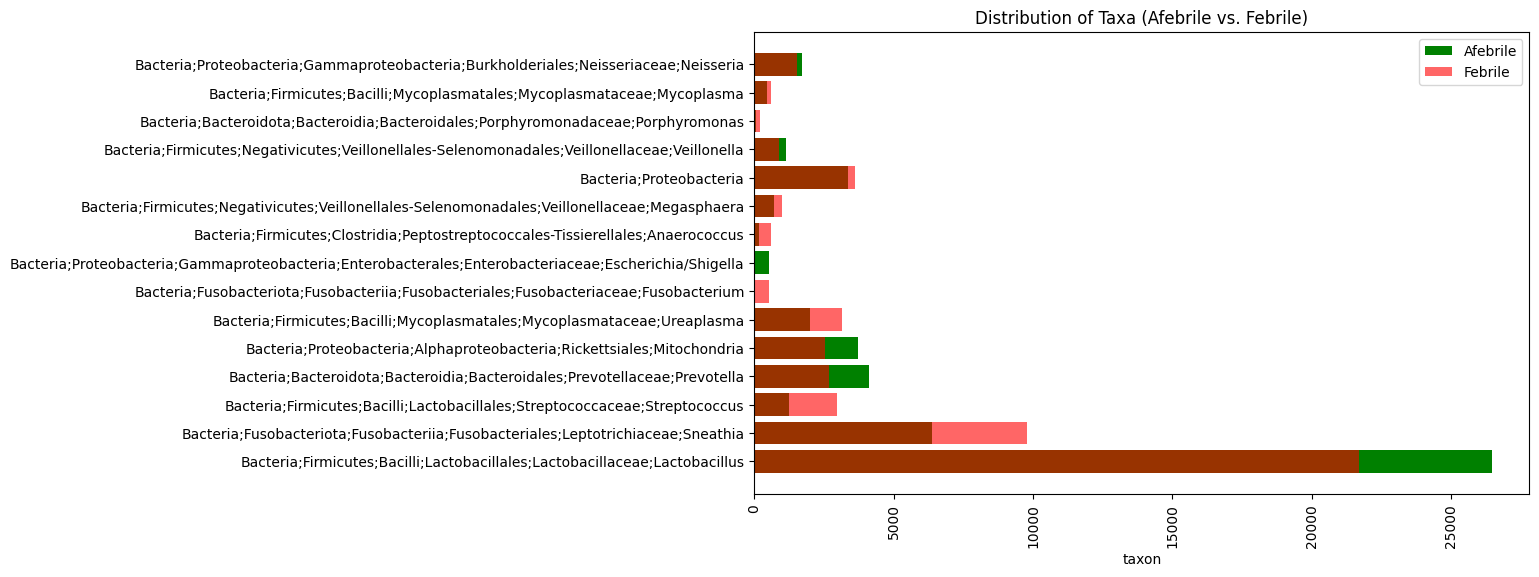

In [ ]:
sorted_df = sorted_df.iloc[:15]
xticks = [strings[int(i)] for i in sorted_df['Index']]
print(xticks)
plt.figure(figsize=(10, 6))
plt.barh(xticks, sorted_df['Afebrile'], label="Afebrile", color='green')
plt.barh(xticks, sorted_df['Febrile'], label="Febrile", color='red', alpha=0.6)
plt.xlabel('taxon')
plt.xticks(rotation=90)
plt.legend()
plt.title('Distribution of Taxa (Afebrile vs. Febrile)')
plt.show()

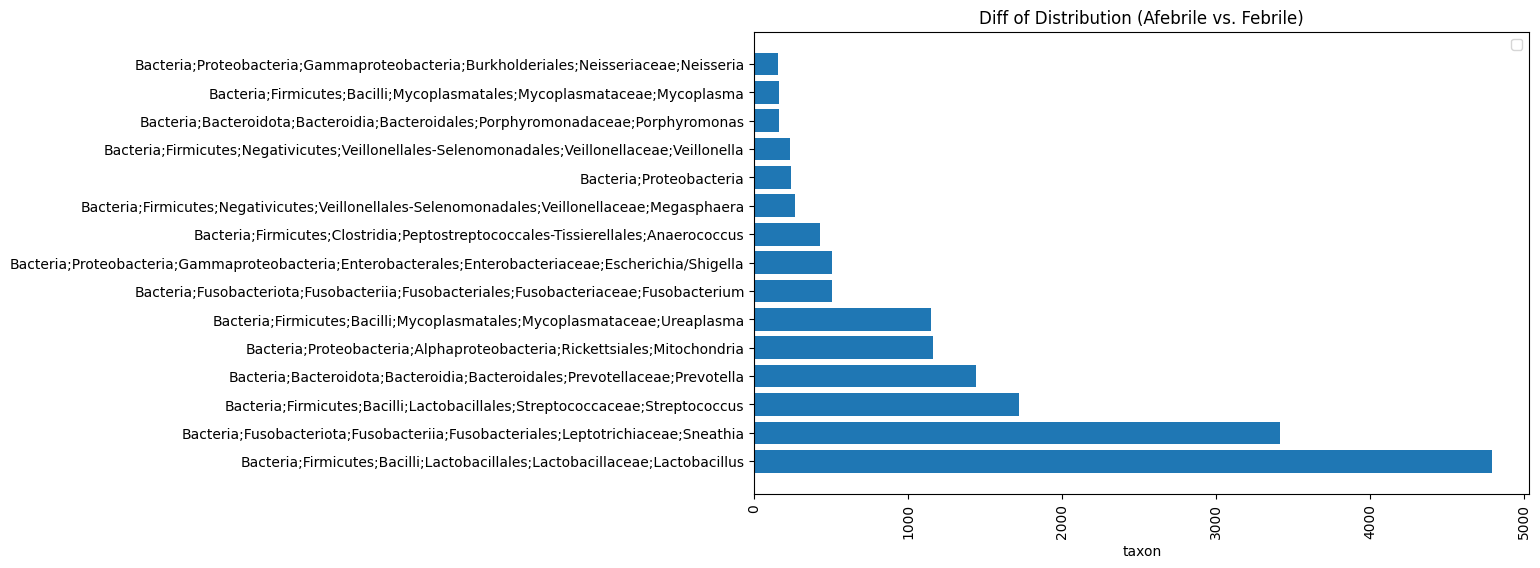

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(xticks, sorted_df['diff'])
plt.xlabel('taxon')
plt.xticks(rotation=90)
plt.legend()
plt.title('Diff of Distribution (Afebrile vs. Febrile)')
plt.show()

In [ ]:
|differential_taxas =   taxon_presence[abs(taxon_presence['Afebrile'] - taxon_presence['Febrile']) == 1].reset_index(drop=True)


In [ ]:
differential_taxas

,Afebrile,Febrile,Index
0,0.0,1.0,3
1,0.0,1.0,5
2,0.0,1.0,9
3,1.0,0.0,20
4,0.0,1.0,21
...,...,...,...
172,0.0,1.0,361
173,0.0,1.0,362
174,1.0,0.0,389
175,1.0,0.0,390


In [ ]:
differential_taxas['Index'] = differential_taxas['Index'].astype(str)
df['Index'] = df['Index'].astype(str)

merged_df = pd.merge(differential_taxas, df, on='Index', how='inner')


In [ ]:
merged_df

,Afebrile,Febrile,Index,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,0.0,1.0,3,Bacteria,Abditibacteriota,Abditibacteria,Abditibacteriales,Abditibacteriaceae,Abditibacterium,N/A
1,0.0,1.0,5,Bacteria,Actinobacteriota,Actinobacteria,Actinomycetales,Actinomycetaceae,N/A,N/A
2,0.0,1.0,9,Bacteria,Actinobacteriota,Actinobacteria,Actinomycetales,Actinomycetaceae,Trueperella,N/A
3,1.0,0.0,20,Bacteria,Actinobacteriota,Actinobacteria,Corynebacteriales,Dietziaceae,Dietzia,N/A
4,0.0,1.0,21,Bacteria,Actinobacteriota,Actinobacteria,Corynebacteriales,Mycobacteriaceae,Mycobacterium,N/A
...,...,...,...,...,...,...,...,...,...,...
172,0.0,1.0,361,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Aquamonas,N/A
173,0.0,1.0,362,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Buttiauxella,N/A
174,1.0,0.0,389,Bacteria,Verrucomicrobiota,Chlamydiae,Chlamydiales,Chlamydiaceae,N/A,N/A
175,1.0,0.0,390,Bacteria,Verrucomicrobiota,Chlamydiae,Chlamydiales,Chlamydiaceae,Chlamydia,N/A


In [ ]:
taxa_afebrile = merged_df[merged_df['Afebrile'] == 1.0 ].drop(columns=['Febrile'], axis=1)
taxa_afebrile

,Afebrile,Index,Kingdom,Phylum,Class,Order,Family,Genus,Species
3,1.0,20,Bacteria,Actinobacteriota,Actinobacteria,Corynebacteriales,Dietziaceae,Dietzia,N/A
5,1.0,23,Bacteria,Actinobacteriota,Actinobacteria,Corynebacteriales,Nocardiaceae,Rhodococcus,N/A
8,1.0,26,Bacteria,Actinobacteriota,Actinobacteria,Micrococcales,N/A,N/A,N/A
10,1.0,29,Bacteria,Actinobacteriota,Actinobacteria,Micrococcales,Demequinaceae,Demequina,N/A
11,1.0,33,Bacteria,Actinobacteriota,Actinobacteria,Micrococcales,Dermatophilaceae,Piscicoccus,N/A
...,...,...,...,...,...,...,...,...,...
164,1.0,157,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,Streptococcus agalactiae
170,1.0,333,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Aquaspirillaceae,N/A,N/A
174,1.0,389,Bacteria,Verrucomicrobiota,Chlamydiae,Chlamydiales,Chlamydiaceae,N/A,N/A
175,1.0,390,Bacteria,Verrucomicrobiota,Chlamydiae,Chlamydiales,Chlamydiaceae,Chlamydia,N/A


In [ ]:
taxa_febrile = merged_df[merged_df['Febrile'] == 1.0 ].drop(columns=['Afebrile'], axis=1)
taxa_febrile

,Febrile,Index,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,1.0,3,Bacteria,Abditibacteriota,Abditibacteria,Abditibacteriales,Abditibacteriaceae,Abditibacterium,N/A
1,1.0,5,Bacteria,Actinobacteriota,Actinobacteria,Actinomycetales,Actinomycetaceae,N/A,N/A
2,1.0,9,Bacteria,Actinobacteriota,Actinobacteria,Actinomycetales,Actinomycetaceae,Trueperella,N/A
4,1.0,21,Bacteria,Actinobacteriota,Actinobacteria,Corynebacteriales,Mycobacteriaceae,Mycobacterium,N/A
6,1.0,24,Bacteria,Actinobacteriota,Actinobacteria,Corynebacteriales,Nocardiaceae,Williamsia,N/A
...,...,...,...,...,...,...,...,...,...
168,1.0,285,Bacteria,Fusobacteriota,Fusobacteriia,Fusobacteriales,Leptotrichiaceae,Sneathia,Sneathia sanguinegens
169,1.0,289,Bacteria,Myxococcota,Polyangia,Polyangiales,Polyangiaceae,Pajaroellobacter,N/A
171,1.0,338,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Comamonadaceae,Alicycliphilus,N/A
172,1.0,361,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Aquamonas,N/A


In [ ]:
def find_dist_diff(col, taxa_afebrile, taxa_febrile):
  afebrile_class_counts = taxa_afebrile[col].value_counts()

  # Class distribution for febrile dataset
  febrile_class_counts = taxa_febrile[col].value_counts()

  # Plotting the distributions
  plt.figure(figsize=(8, 6))


  # Afebrile dataset distribution
  plt.bar(afebrile_class_counts.index, afebrile_class_counts.values, color='blue', label='Afebrile')

  # Febrile dataset distribution
  plt.bar(febrile_class_counts.index, febrile_class_counts.values, color='red', alpha=0.5, label='Febrile')

  # Adjusting the plot appearance
  plt.title(f'Distribution of {col} (Febrile vs. Afebrile)')
  plt.xlabel(col)
  plt.xticks(rotation=90)  # Rotate x-labels by 90 degrees
  plt.legend()

  # Adjusting the layout and displaying the plot
  plt.tight_layout()
  plt.show()

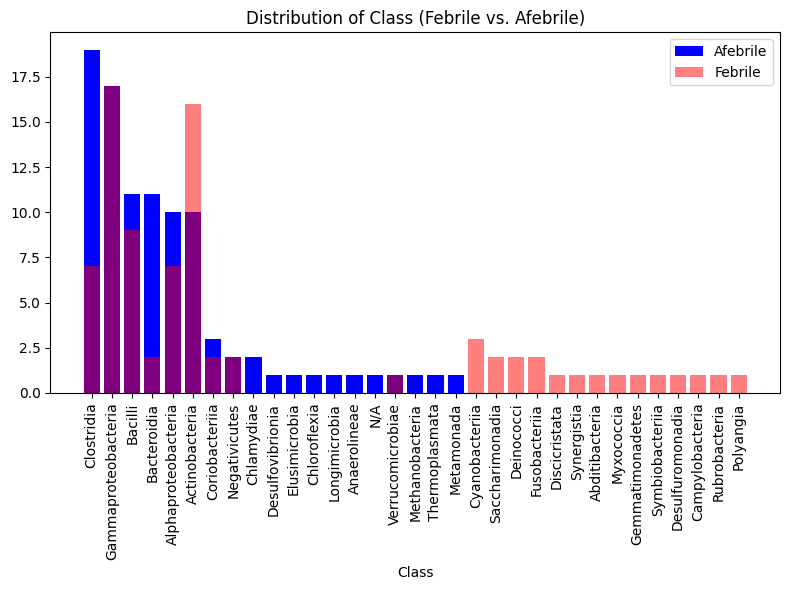

In [ ]:
find_dist_diff('Class', taxa_afebrile, taxa_febrile)

In [ ]:
unique_class_febrile = list(set(taxa_febrile['Class'].unique()) -  set(taxa_afebrile['Class'].unique()))
common_class = list(set(taxa_febrile['Class'].unique()).intersection(set(taxa_afebrile['Class'].unique())))
print(common_class)

['Clostridia', 'Bacilli', 'Bacteroidia', 'Negativicutes', 'Alphaproteobacteria', 'Gammaproteobacteria', 'Coriobacteriia', 'Verrucomicrobiae', 'Actinobacteria']


In [ ]:
idx = taxa_febrile[taxa_febrile['Class'] == common_class[0]]['Index'].tolist()
print(idx)
y = processed_data[idx[1]].value_counts()
y

['175', '213', '199', '203', '248', '244', '245']


0.0     195
27.0      1
Name: 213, dtype: int64

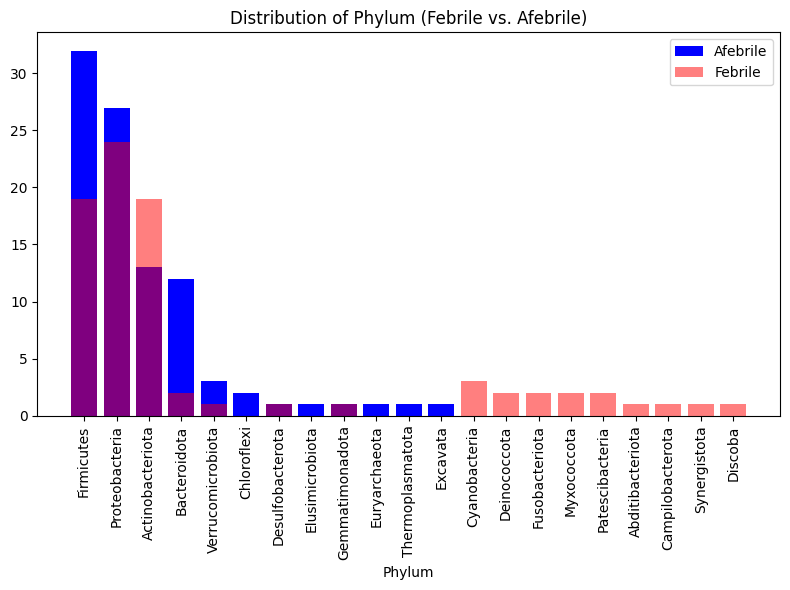

In [ ]:
find_dist_diff('Phylum', taxa_afebrile, taxa_febrile)